In [65]:
import pandas as pd
import numpy as np

### Fourth task
Задача Коши для обыкновенного дифференциального уравнения 1-го порядка.
$$y' = \cos{(2x + y)} - 1.5(x - y), y(0) = 0$$

In [66]:
def f(x, y):
    val = np.cos(2 * x + y) - 1.5 * (x - y)
    return val

1. Получить таблицу значений решения задачи c шагом h = 0.05 на [0, 0.5], используя wolfram alpha

In [67]:
y_math = [0, 0.0498094, 0.0984582, 0.144764, 0.187567, 0.225781, 0.258425, 0.284645, 0.303719, 0.315053, 0.318162]
data = y_math
xx = [round(x, 2) for x in np.arange(0, 0.55, 0.05)]
indexes = ["$y$"]
df = pd.DataFrame(data, index = xx, columns = indexes)
df.columns.name = "$x$"

df

$x$,$y$
0.00,0.000000
0.05,0.049809
0.10,0.098458
0.15,0.144764
0.20,0.187567
0.25,0.225781
0.30,0.258425
0.35,0.284645
0.40,0.303719
0.45,0.315053


2. Метод Эйлера (улучшенный) на [0, 0.5]

In [68]:
def Euler(y, x, h):
    for i in range(1, len(y)):
        val_1 = f(x[i - 1], y[i - 1])
        Y_m = y[i - 1] + h * val_1
        val_2 = f(x[i], Y_m)
        y[i] = y[i - 1] + h / 2 * (val_1 + val_2)
    return y

In [69]:
a, b, h, h_2 = 0, 0.5, 0.05, 0.025
y_a = 0
n = len(xx)
y_h = [0]*n
y_h[0] = y_a

y_h = Euler(y_h, xx, h)

xx_2 = [round(x, 2) for x in np.arange(0, 0.55, h_2)]
n_2 = len(xx_2)
Y_h_2 = [0]*n_2
y_h_2 = [0]*n
Y_h_2[0] = y_a

Y_h_2 = Euler(Y_h_2, xx_2, h_2)
for i in range(0, n_2, 2):
    y_h_2[i//2] = Y_h_2[i]

R = [0]*n
y_rev = [0]*n
s = 2

for i in range(n):
    R[i] = (y_h_2[i] - y_h[i])/(2**s - 1)
    y_rev[i] = y_h_2[i] + R[i]

errs = [0]*n
for i in range(n):
    errs[i] = y_rev[i] - y_math[i]
data = [y_h, y_h_2, y_rev, errs]
indexes = [
    "y^h",
    "y^(h/2)",
    "y_rev",
    "y_rev - y_math"
]
df = pd.DataFrame(data, index= indexes, columns=xx).T
df.columns.name = "$x$"
df

$x$,y^h,y^(h/2),y_rev,y_rev - y_math
0.00,0.000000,0.000000,0.000000,0.000000
0.05,0.049719,0.049999,0.050092,0.000283
0.10,0.098287,0.098390,0.098424,-0.000034
0.15,0.144521,0.144961,0.145108,0.000344
0.20,0.187267,0.187444,0.187503,-0.000064
0.25,0.225438,0.225993,0.226177,0.000396
0.30,0.258051,0.258268,0.258340,-0.000085
0.35,0.284253,0.284874,0.285081,0.000436
0.40,0.303321,0.303547,0.303623,-0.000096
0.45,0.314658,0.314456,0.314389,-0.000664


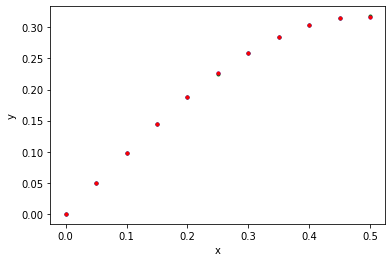

In [70]:
from matplotlib import pyplot as plt

plt.plot(xx, y_h, 'g.')
plt.plot(xx, y_h_2, 'b.')
plt.plot(xx, y_rev, 'r.')



plt.xlabel("x")
plt.ylabel("y")
plt.show()

5. Вычислить решение методом Рунге-Кутты 4-ого порядка с точностью ε=0.000001 на
[0, 0.5] — y_RK.

In [71]:
def Runge_Kut(y, x, h):

    for i in range(1, len(y)):
        k1 = h*f(x[i-1], y[i-1])
        k2 = h*f(x[i-1] + h/2, y[i-1] +k1/2)
        k3 = h*f(x[i-1] + h/2, y[i-1] +k2/2)
        k4 = h*f(x[i-1] + h, y[i-1] +k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 +k4)*(1/6)
    return y

In [72]:
xx_2 = [round(x, 2) for x in np.arange(0, 0.55, h_2)]
n_2 = len(xx_2)
Y_RK_2 = [0]*n_2
y_RK_2 = [0]*n
Y_RK_2[0] = y_a

Y_RK_2 = Runge_Kut(Y_RK_2, xx_2, h_2)
for i in range(0, n_2, 2):
    y_RK_2[i//2] = Y_RK_2[i]

errs_RK_2 = [0]*n
for i in range(n):
    errs_RK_2[i] = np.abs(y_RK_2[i] - y_math[i] )

Решения 

In [73]:
y_RK_2

[0,
 0.05002742492409448,
 0.09843341338348237,
 0.145026842440967,
 0.1875202612145448,
 0.2260821079489702,
 0.2583628395576167,
 0.28497450446736033,
 0.3036481106855964,
 0.3145563964509019,
 0.317220667608657]

Погрешности

In [74]:
errs_RK_2

[0,
 0.00021802492409448565,
 2.478661651762748e-05,
 0.00026284244096699827,
 4.6738785455219256e-05,
 0.0003011079489702029,
 6.216044238332996e-05,
 0.0003295044673603531,
 7.088931440363266e-05,
 0.0004966035490981402,
 0.000941332391342975]

6. Вычислить решение экстраполяционным методом Адамса 4-ого порядка с шагом из метода Рунге-Кутты на промежутке [4h, 0.5] — y_Ad_ex. Начало таблицы строить методом Рунге-Кутты.

экстраполяционный метод Адамса 4-ого порядка

In [75]:
def Adams_ex(y, x, h):
    for i in range(5, len(y)):
        q_4 = h*f(x[i-5], y[i-5])
        q_3 = h*f(x[i-4], y[i-4])
        q_2 = h*f(x[i-3], y[i-3])
        q_1 = h*f(x[i-2], y[i-2])
        q_0 = h*f(x[i-1], y[i-1])
        y[i] = y[i-1] + (1/720)*(1901*q_0 - 2774*q_1 + 2616*q_2 - 1274*q_3 + 251*q_4)
    return y

In [76]:
y_Ad_ex

[0.09843341338348237,
 0.12195185424950362,
 0.145026842440967,
 0.16694329345074654,
 0.1875202612145448,
 0.20797486863150189,
 0.22635806796795468,
 0.24263926063441055,
 0.2602959644579306,
 0.2723772043481484,
 0.2869325169243343,
 0.29550955893277087,
 0.3065136468733717,
 0.3111827737975041,
 0.3183704498584339,
 0.31889655592654903,
 0.32200840378822987]

In [77]:
xx = [round(x, 2) for x in np.arange(4*h_2, 0.5+h_2, h_2)]
y_Ad_ex = [0]*len(xx)
for i in range(5):
    y_Ad_ex[i] = Y_RK_2[i+4]
y_Ad_ex = Adams_ex(y_Ad_ex, xx, h_2)

интерполяционный метод Адамса 4-ого порядка

In [78]:
def Adams_in(y_ex, y, x, h):
    for i in range(4, len(y)):
        q_3 = h * f(x[i - 4], y[i - 4])
        q_2 = h * f(x[i - 3], y[i - 3])
        q_1 = h * f(x[i - 2], y[i - 2])
        q_0 = h * f(x[i - 1], y[i - 1])

        y_0 = y_ex[i]
        q_4 = h*f(x[i], y_0)
        y_1 = y[i-1] + (1/720)*(251*q_4 + 646*q_0 - 264*q_1 + 106*q_2 - 19*q_3)
        k=0
        while np.abs(y_1 - y_0) >= 0.0001 and k!=10:
            y_0 = y_1
            q_4 = h * f(x[i], y_0)
            y_1 = y[i - 1] + (1 / 720) * (251 * q_4 + 646 * q_0 - 264 * q_1 + 106 * q_2 - 19 * q_3)
            k+=1
        y[i] = y_1

    return y

In [79]:
y_Ad_in

[0.09843341338348237,
 0.12195185424950362,
 0.145026842440967,
 0.16694329345074654,
 0.18760093966318672,
 0.20757258371830606,
 0.22631038241775125,
 0.24340775117992236,
 0.2593670484283936,
 0.27333912481216843,
 0.2860159319268083,
 0.2964998495898348,
 0.3055453290473566,
 0.31222828526997715,
 0.31735552894252145,
 0.31998330393198177,
 0.32095961610073315]

In [84]:
xx = [round(x, 2) for x in np.arange(4*h_2, 0.5+h_2, h_2)]
y_Ad_in = [0]*len(xx)
for i in range(4):
    y_Ad_in[i] = Y_RK_2[i+4]
y_Ad_in = Adams_in(y_Ad_ex, y_Ad_in, xx, h_2)

In [85]:
y_math2 = [0, 0.0249764, 0.0498094, 0.0743528, 0.0984583, 0.121977, 0.144764, 0.166673, 0.187567, 0.207312, 0.225781, 0.242856, 
          0.258426, 0.272387, 0.284646, 0.295116, 0.30372, 0.310386, 0.315053, 0.317662, 0.318162]

errs1 = [0]*len(xx)
errs2 = [0]*len(xx)

for i in range(len(xx)):
    errs1[i] = y_math2[i] - y_Ad_ex[i]
    errs2[i] = y_math2[i] - y_Ad_in[i]

data = [y_Ad_ex, errs1, y_Ad_in, errs2]
indexes = [
    "y_AD_ex",
    "y_math - y_AD_ex",
    "y_AD_in",
    "y_math - y_AD_in"
]
df = pd.DataFrame(data, index= indexes, columns=xx).T
df.columns.name = "$x$"
df

$x$,y_AD_ex,y_math - y_AD_ex,y_AD_in,y_math - y_AD_in
0.10,0.098433,-0.098433,0.098433,-0.098433
0.12,0.121952,-0.096975,0.121952,-0.096975
0.15,0.145027,-0.095217,0.145027,-0.095217
0.18,0.166943,-0.092590,0.166943,-0.092590
0.20,0.187520,-0.089062,0.187601,-0.089143
0.22,0.207975,-0.085998,0.207573,-0.085596
0.25,0.226358,-0.081594,0.226310,-0.081546
0.27,0.242639,-0.075966,0.243408,-0.076735
0.30,0.260296,-0.072729,0.259367,-0.071800
0.32,0.272377,-0.065065,0.273339,-0.066027
